In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fn = 'elevutm2.txt'

In [3]:
# Reads the first six lines of an ArcAscii file given by the string "filename" and returns a dictionary of the values
# Use the given names as keys for the dictionary.  Values should be numbers (floats or integers as appropriate).
# Nodata should be considered a float

def read_header(filename):
    d = {}
    
    l = np.loadtxt(filename, dtype='str', max_rows=6)
    
    for line in l:
        d.update({line[0]:line[1]})
    
    d['ncols'] = int(d['ncols'])
    d['nrows'] = int(d['nrows'])
    d['xllcorner'] = float(d['xllcorner'])
    d['yllcorner'] = float(d['yllcorner'])
    d['cellsize'] = float(d['cellsize'])
    d['NODATA_value'] = float(d['NODATA_value'])
    
    return d

In [4]:
header = read_header(fn)
print(header)

{'ncols': 1532, 'nrows': 1858, 'xllcorner': 545188.67725766, 'yllcorner': 4097120.2808038, 'cellsize': 27.776299740871, 'NODATA_value': -9999.0}


In [5]:
def read_data(filename):
    d = read_header(filename)
    
    arr = np.ravel(np.loadtxt(filename, skiprows=6))
    
    x = np.reshape(arr, (d['nrows'], d['ncols']))
    
    for row in x:
        for item in row:
            if item == d['NODATA_value']:
                item = np.nan()
    
    return x

In [6]:
x = read_data(fn)

stats = (np.mean(x), np.std(x))

print(np.shape(x)) # shape
print(stats) # mean and std

(1858, 1532)
(636.528966461066, 156.4098944682388)


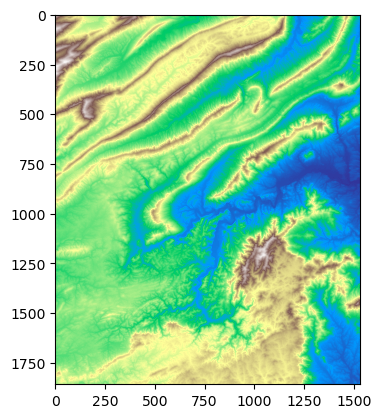

In [7]:
plt.imshow(x, 'terrain')

Text(0.5, 0, 'Elevation Values')

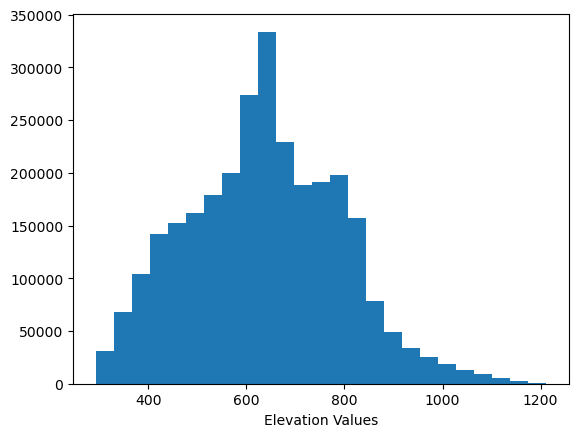

In [8]:
_ = plt.hist(x.ravel(), 25)
plt.xlabel('Elevation Values')

The reason we should use the ravel function inside the histogram function is that our current x is a 2-dimensional array. In order to create an accurate histogram, we need to transform this 2-dimensional array into a 1-dimensional array, which is what the ravel function does.